In [36]:
%matplotlib inline

该层的结构[6, 1, 5, 5]
该层的结构[6]
该层的结构[16, 6, 5, 5]
该层的结构[16]
该层的结构[120, 400]
该层的结构[120]
该层的结构[84, 120]
该层的结构[84]
该层的结构[10, 84]
该层的结构[10]
总参数和61706


Neural Networks
===============

使用torch.nn包来构建神经网络。

上一讲已经讲过了``autograd``，``nn``包依赖``autograd``包来定义模型并求导。
一个``nn.Module``包含各个层和一个``forward(input)``方法，该方法返回``output``。



例如：

![](https://pytorch.org/tutorials/_images/mnist.png)

它是一个简单的前馈神经网络，它接受一个输入，然后一层接着一层地传递，最后输出计算的结果。

神经网络的典型训练过程如下：

1. 定义包含一些可学习的参数(或者叫权重)神经网络模型； 
2. 在数据集上迭代； 
3. 通过神经网络处理输入； 
4. 计算损失(输出结果和正确值的差值大小)；
5. 将梯度反向传播回网络的参数； 
6. 更新网络的参数，主要使用如下简单的更新原则： 
``weight = weight - learning_rate * gradient``

  

定义网络
------------------

开始定义一个网络：



In [37]:
# -*-conding:UTF-8 -*-
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        #初始化
        # 用于net = Net() 
        # 复制并使用Net的父类的初始化方法，即先运行nn.Module的初始化函数
        super(Net, self).__init__() 
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        ''' 
        参数
        (self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0, dilation=1, groups=1, bias=True)
        ''' 
        #定义conv1 卷积函数 输入特征图为1（灰度图）   输出为6个特征图  卷积核5*5
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        #全链接函数为线性函数  y = Wx + b 将16*5*5个节点连接到120个节点上
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    #定义前行传播函数 该函数必须定义  一旦定义成果，向后传播函数也会自动生成    
    def forward(self, x):
        # Max pooling over a (2, 2) window
        # 输入x经过卷积conv1后，经过激活函数relu，使用2*2窗口进行最大池化，然后更新到x
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        
        # add
        print("x size before")
        print(x.size())
        #x size before
        #torch.Size([1, 16, 5, 5])
        #  end add
        
        # view函数将张量x更新成一维的向量形式，总特征数不变，为接下来的全连接做准备
        #将一个多行的Tensor,拼接成一行
        x = x.view(-1, self.num_flat_features(x))
        
        # add
        print("self.num_flat_features(x)")
        print(self.num_flat_features(x))
        #self.num_flat_features(x)
        #400
        print("x size after")
        print(x.size())
        #x size after
        #torch.Size([1, 400])
        # end add
        
        #经过全连接函数后 再经过relu激活函数，然后更新x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #经过全连接函数后更新x
        x = self.fc3(x)
        return x
    
    #计算张量的总特征数  [1, 16, 5, 5] 特征数为16*5**5
    def num_flat_features(self, x):
        print("x.size()")
        print(x.size())
        size = x.size()[1:]  # all dimensions except the batch dimension
        print("size = x.size()[1:]   size为")
        print(size)
        num_features = 1
        for s in size:
            print('s')
            print(s)
            num_features *= s
            print(" num_features *= s  后 num_features  ")
            print(num_features)
        return num_features


net = Net() 
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


在模型中必须要定义 ``forward`` 函数，``backward``
函数（用来计算梯度）会被``autograd``自动创建。
可以在 ``forward`` 函数中使用任何针对 Tensor 的操作。

 ``net.parameters()``返回可被学习的参数（权重）列表和值



In [38]:
# net.parameters()返回可被学习的参数（权重）列表和值
#需要训练的参数的数量
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

k=0
for i in params:
    l=1
    print("该层的结构"+str(list(i.size())))
    for j in i.size():
        l*=j
    print("参数和："+str(l))
    k=k+l
print("总参数和"+str(k))

# Net(
#   (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
#   (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
#   (fc1): Linear(in_features=400, out_features=120, bias=True)
#   (fc2): Linear(in_features=120, out_features=84, bias=True)
#   (fc3): Linear(in_features=84, out_features=10, bias=True)
# )

10
torch.Size([6, 1, 5, 5])
该层的结构[6, 1, 5, 5]
参数和：150
该层的结构[6]
参数和：6
该层的结构[16, 6, 5, 5]
参数和：2400
该层的结构[16]
参数和：16
该层的结构[120, 400]
参数和：48000
该层的结构[120]
参数和：120
该层的结构[84, 120]
参数和：10080
该层的结构[84]
参数和：84
该层的结构[10, 84]
参数和：840
该层的结构[10]
参数和：10
总参数和61706


测试随机输入32×32。
注：这个网络（LeNet）期望的输入大小是32×32，如果使用MNIST数据集来训练这个网络，请把图片大小重新调整到32×32。



In [39]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
# net.parameters()返回可被学习的参数（权重）列表和值
#需要训练的参数的数量
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

k=0
for i in params:
    l=1
    print("该层的结构"+str(list(i.size())))
    for j in i.size():
        l*=j
    k=k+l
print("总参数和"+str(k))


print("out:")
print(out)

x size before
torch.Size([1, 16, 5, 5])
x.size()
torch.Size([1, 16, 5, 5])
size = x.size()[1:]   size为
torch.Size([16, 5, 5])
s
16
 num_features *= s  后 num_features  
16
s
5
 num_features *= s  后 num_features  
80
s
5
 num_features *= s  后 num_features  
400
self.num_flat_features(x)
x.size()
torch.Size([1, 400])
size = x.size()[1:]   size为
torch.Size([400])
s
400
 num_features *= s  后 num_features  
400
400
x size after
torch.Size([1, 400])
10
torch.Size([6, 1, 5, 5])
该层的结构[6, 1, 5, 5]
该层的结构[6]
该层的结构[16, 6, 5, 5]
该层的结构[16]
该层的结构[120, 400]
该层的结构[120]
该层的结构[84, 120]
该层的结构[84]
该层的结构[10, 84]
该层的结构[10]
总参数和61706
out:
tensor([[ 0.1764,  0.0688,  0.0216,  0.0414,  0.1376,  0.0054, -0.0468,  0.0038,
          0.0777,  0.0253]], grad_fn=<AddmmBackward>)


将所有参数的梯度缓存清零，然后进行随机梯度的的反向传播：



In [40]:
net.zero_grad() #将所有参数的梯度缓存清零
out.backward(torch.randn(1, 10))

<div class="alert alert-info"><h4>Note</h4><p>``torch.nn`` 只支持小批量输入。整个 ``torch.nn``
包都只支持小批量样本，而不支持单个样本。

    例如，``nn.Conv2d`` 接受一个4维的张量，
    ``每一维分别是sSamples * nChannels * Height * Width（样本数*通道数*高*宽）``。

    如果你有单个样本，只需使用 ``input.unsqueeze(0)`` 来添加其它的维数</p></div>

在继续之前，我们回顾一下到目前为止用到的类。

**回顾:**
  -  ``torch.Tensor``：一个用过自动调用 ``backward()``实现支持自动梯度计算的 *多维数组* ，
      并且保存关于这个向量的*梯度* w.r.t.
  -  ``nn.Module``：神经网络模块。封装参数、移动到GPU上运行、导出、加载等。
  -  ``nn.Parameter``：一种变量，当把它赋值给一个``Module``时，被 *自动* 地注册为一个参数。
  -  ``autograd.Function``：实现一个自动求导操作的前向和反向定义，每个变量操作至少创建一个函数节点，每一个``Tensor``的操作都回创建一个接到创建``Tensor``和 *编码其历史* 的函数的``Function``节点。

**重点如下：**
  -  定义一个网络
  -  处理输入，调用backword

**还剩：**
  -  计算损失
  -  更新网络权重

损失函数
-------------
一个损失函数接受一对 (output, target) 作为输入，计算一个值来估计网络的输出和目标值相差多少。

***译者注：output为网络的输出，target为实际值***

nn包中有很多不同的[损失函数](https://pytorch.org/docs/nn.html#loss-functions)。
``nn.MSELoss``是一个比较简单的损失函数，它计算输出和目标间的**均方误差**，
例如：



In [41]:
#将一个多行的Tensor,拼接成一行
import torch
 
a = torch.Tensor(2,3)
print(a)
# tensor([[0.0000, 0.0000, 0.0000],
#        [0.0000, 0.0000, 0.0000]])
 
print(a.view(1,-1))  #其中参数-1表示剩下的值的个数一起构成一个维度
# tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
#如上例中，第一个参数1将第一个维度的大小设定成1，
#后一个-1就是说第二个维度的大小=元素总数目/第一个维度的大小，此例中为2*3/1=6.

aa=torch.randn(3,4,5,7)
d = aa.view(aa.size(0),aa.size(1),-1)  #等价于d = aa.view(3,4,-1)
print("d  size")
print(d.size())
e=aa.view(4,-1,5)
print("e  size")
print(e.size())

tensor([[7.8644e-01, 4.5912e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
tensor([[7.8644e-01, 4.5912e-41, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])
d  size
torch.Size([3, 4, 35])
e  size
torch.Size([4, 21, 5])


In [47]:
output = net(input)
target = torch.randn(10)  # 随机值作为样例
print("target 前")
print(target)
#将一个多行的Tensor,拼接成一行
#其中参数-1表示剩下的值的个数一起构成一个维度
target = target.view(1, -1)  # 使target和output的shape相同
print("target 后")
print(target)
criterion = nn.MSELoss() #均方损失函数

loss = criterion(output, target)
print("loss")
print(loss)

x size before
torch.Size([1, 16, 5, 5])
x.size()
torch.Size([1, 16, 5, 5])
size = x.size()[1:]   size为
torch.Size([16, 5, 5])
s
16
 num_features *= s  后 num_features  
16
s
5
 num_features *= s  后 num_features  
80
s
5
 num_features *= s  后 num_features  
400
self.num_flat_features(x)
x.size()
torch.Size([1, 400])
size = x.size()[1:]   size为
torch.Size([400])
s
400
 num_features *= s  后 num_features  
400
400
x size after
torch.Size([1, 400])
target 前
tensor([-0.6149,  0.6415, -0.9337,  0.5052, -1.5060,  0.6875, -0.7407,  0.1086,
         0.6976, -0.4932])
target 后
tensor([[-0.6149,  0.6415, -0.9337,  0.5052, -1.5060,  0.6875, -0.7407,  0.1086,
          0.6976, -0.4932]])
loss
tensor(0.6377, grad_fn=<MseLossBackward>)


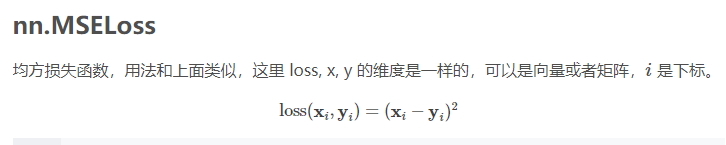

Now, if you follow ``loss`` in the backward direction, using its
``.grad_fn`` attribute, you will see a graph of computations that looks
like this:

::

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the loss, and all Tensors in the graph that has ``requires_grad=True``
will have their ``.grad`` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:



In [44]:
print(loss.grad_fn)  # MSELoss  均方误差  L2
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

反向传播
--------
调用loss.backward()获得反向传播的误差。

但是在调用前需要清除已存在的梯度，否则梯度将被累加到已存在的梯度。

现在，我们将调用loss.backward()，并查看conv1层的偏差（bias）项在反向传播前后的梯度。




In [45]:
net.zero_grad()     # 清除梯度

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0031,  0.0059,  0.0022, -0.0004, -0.0074,  0.0073])


如何使用损失函数

**稍后阅读：**

  `nn`包，包含了各种用来构成深度神经网络构建块的模块和损失函数，完整的文档请查看[here](https://pytorch.org/docs/nn)。

**剩下的最后一件事:**

  - 新网络的权重

更新权重
------------------
在实践中最简单的权重更新规则是随机梯度下降（SGD）：

     ``weight = weight - learning_rate * gradient``

我们可以使用简单的Python代码实现这个规则：

```python

    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)
```
但是当使用神经网络是想要使用各种不同的更新规则时，比如SGD、Nesterov-SGD、Adam、RMSPROP等，PyTorch中构建了一个包``torch.optim``实现了所有的这些规则。
使用它们非常简单：


In [46]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

x size before
torch.Size([1, 16, 5, 5])
x.size()
torch.Size([1, 16, 5, 5])
size = x.size()[1:]   size为
torch.Size([16, 5, 5])
s
16
 num_features *= s  后 num_features  
16
s
5
 num_features *= s  后 num_features  
80
s
5
 num_features *= s  后 num_features  
400
self.num_flat_features(x)
x.size()
torch.Size([1, 400])
size = x.size()[1:]   size为
torch.Size([400])
s
400
 num_features *= s  后 num_features  
400
400
x size after
torch.Size([1, 400])


.. Note::
    
      Observe how gradient buffers had to be manually set to zero using
      ``optimizer.zero_grad()``. This is because gradients are accumulated
      as explained in `Backprop`_ section.

